# Ejemplo de un Notebook

## Agregar un video

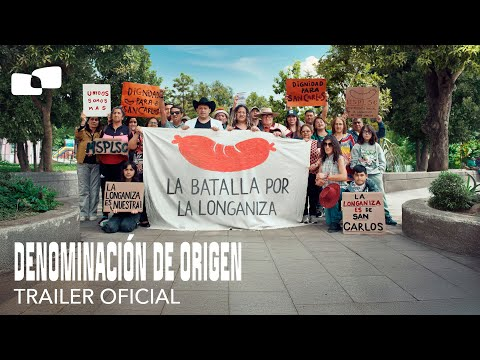

In [3]:
from IPython.display import YouTubeVideo

# Reemplaza el ID por el de tu video (lo que sigue después de v=)
YouTubeVideo('NXcXB1lJskA', width=500, height=300)

## Agregar un audio

In [7]:
from IPython.display import Audio

Audio("audio/godzilla_2.mp3")

## Crear una tabla con pandas

In [8]:
import pandas as pd

df = pd.read_csv('trees.csv', index_col="Index")
df.head(10)


,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
Index,,,
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7
7,11.0,66,15.6
8,11.0,75,18.2
9,11.1,80,22.6


## Grafico con matplotlib

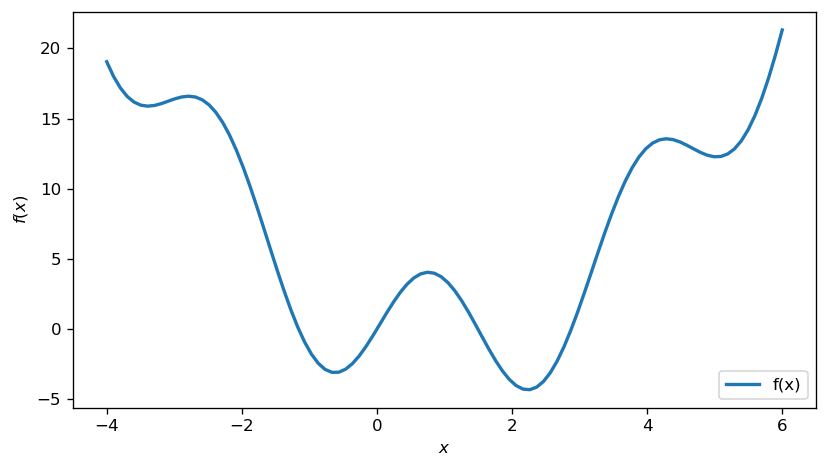

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_plot = np.linspace(-4, 6, num=100)
f = lambda x : x**2 - 2*x + 5*np.sin(2*x)

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, dpi=120)
ax.plot(x_plot, f(x_plot), lw=2, label='f(x)')
ax.set_ylabel(r'$f(x)$')
ax.set_xlabel(r'$x$')
ax.legend(loc=4);

In [ ]:
import numpy as np
from bokeh.layouts import column, row
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import figure, show, output_notebook



# Generar datos
data = np.random.randn(100, 2)

# SOLUCIÓN: Convertimos range(100) a una lista para que Bokeh pueda serializarlo
source = ColumnDataSource(data=dict(
    index=list(range(100)), 
    x=data[:,0], 
    y=data[:,1]
))

# Configuración del gráfico
plot = figure(
    width=550, 
    height=300, 
    tooltips=[("index","$index"),("(x,y)", "($x, $y)")],
    title="Mi primer gráfico interactivo en Jupyter Book"
)

plot.scatter('x', 'y', size=10, source=source, color="tomato", alpha=0.6)

show(plot)



Loading BokehJS ...

In [32]:


t = np.linspace(0, 5, num=1000)
s = np.cos(2.0*np.pi*t)

A = Slider(start=0.1, end=2, value=1, step=.01, title="Amplitud")
f = Slider(start=0.1, end=2, value=1, step=.01, title="Frecuencia")
p = Slider(start=0, end=6.4, value=0, step=.1, title="Desfase")

source = ColumnDataSource(data=dict(t=t, s=s))
plot = Figure(y_range=(-1.5, 1.5), plot_width=550, plot_height=300)
plot.line('t', 's', source=source, line_width=3, line_alpha=0.6)
plot.xaxis[0].axis_label = 'Tiempo [s]'

callback = CustomJS(args=dict(source=source, A=A, f=f, p=p), code="""
    var t = source.data['t'];
    var s = source.data['s'];
    for (var i = 0; i < s.length; i++) {
        s[i] = A.value*Math.cos(2*Math.PI*t[i]*f.value + p.value);
    }
    source.change.emit();
""")

for widget in [A, f, p]:
    widget.js_on_change('value', callback)

show(column(A, f, p, plot))



NameError: name 'Figure' is not defined